In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import time

In [2]:
file_dir = os.path.join(os.getcwd(),'spatial-lstm','sensor_data','interpolated_data')
adcp = []
for i in range(1,5):
    file_name = 'ADCP_Sensor_'+str(i)+'.csv'
    file_path = os.path.join(file_dir,file_name)
    df = pd.read_csv(file_path, parse_dates=True, index_col="observed_timestamp")
    df[np.isnan(df)]=-1 # mask the missing values
    adcp.append(df['value'])
    print(df.index.min(),df.index.max()) # Check timestamp

2019-01-01 00:00:00 2019-12-31 23:30:00
2019-01-01 00:00:00 2019-12-31 23:30:00
2019-01-01 00:00:00 2019-12-31 23:30:00
2019-01-01 00:00:00 2019-12-31 23:30:00


In [3]:
df = pd.DataFrame(adcp).transpose()
df.head()

,value,value,value,value
observed_timestamp,,,,
2019-01-01 00:00:00,28.274415,9.636717,25.353515,19.801758
2019-01-01 00:30:00,27.239258,12.173828,30.364747,18.477539
2019-01-01 01:00:00,27.541013,12.520508,26.920409,19.249998
2019-01-01 01:30:00,29.662109,12.282225,31.734375,18.083008
2019-01-01 02:00:00,32.172850,13.845703,36.116213,17.734374


In [4]:
df.columns = ['ADCP_Sensor_1', 'ADCP_Sensor_2', 'ADCP_Sensor_3', 'ADCP_Sensor_4']

In [5]:
df.head()

,ADCP_Sensor_1,ADCP_Sensor_2,ADCP_Sensor_3,ADCP_Sensor_4
observed_timestamp,,,,
2019-01-01 00:00:00,28.274415,9.636717,25.353515,19.801758
2019-01-01 00:30:00,27.239258,12.173828,30.364747,18.477539
2019-01-01 01:00:00,27.541013,12.520508,26.920409,19.249998
2019-01-01 01:30:00,29.662109,12.282225,31.734375,18.083008
2019-01-01 02:00:00,32.172850,13.845703,36.116213,17.734374


In [6]:
print(df.shape)

(17520, 4)


In [7]:
length  = len(df)
s = int(length*0.8)
e = int(length*1)
print(length, s, e)

17520 14016 17520


In [8]:
# Percentage of data for testing
test_percent = 0.2

# No. of test points
test_points= np.round(len(df)*test_percent)

# Test Cut off point (index value)
test_ind = int(len(df)-test_points)

print(test_percent, test_points, test_ind)

0.2 3504.0 14016


In [9]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [10]:
print(train.shape, test.shape)
print(type(train), type(test))

(14016, 4) (3504, 4)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [13]:
print(scaled_train.shape, scaled_test.shape)
print(type(scaled_train), type(scaled_test))

(14016, 4) (3504, 4)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [14]:
scaled_train

array([[0.3241514 , 0.06822284, 0.19850746, 0.07267823],
       [0.31107629, 0.09173929, 0.23774331, 0.06716608],
       [0.31488777, 0.09495265, 0.21077558, 0.07038149],
       ...,
       [0.20665634, 0.07229616, 0.1581591 , 0.16632364],
       [0.25348741, 0.06611763, 0.154122  , 0.16827421],
       [0.20732158, 0.06110818, 0.15124704, 0.16964173]])

In [15]:
scaled_test

array([[0.20671965, 0.06493178, 0.16143929, 0.17025192],
       [0.20611447, 0.06037499, 0.15501657, 0.17050209],
       [0.20571706, 0.05825688, 0.13732354, 0.170781  ],
       ...,
       [0.26808879, 0.08619922, 0.1929261 , 0.06286123],
       [0.26047812, 0.09911467, 0.20100774, 0.06302383],
       [0.27684932, 0.1085916 , 0.25160183, 0.05823526]])

In [16]:
scaled_train = pd.DataFrame(scaled_train, columns=['ADCP_Sensor_1', 'ADCP_Sensor_2', 'ADCP_Sensor_3', 'ADCP_Sensor_4'])
scaled_train.head()

,ADCP_Sensor_1,ADCP_Sensor_2,ADCP_Sensor_3,ADCP_Sensor_4
0,0.324151,0.068223,0.198507,0.072678
1,0.311076,0.091739,0.237743,0.067166
2,0.314888,0.094953,0.210776,0.070381
3,0.341679,0.092744,0.248467,0.065524
4,0.373393,0.107236,0.282775,0.064073


In [17]:
scaled_test = pd.DataFrame(scaled_test, columns=['ADCP_Sensor_1', 'ADCP_Sensor_2', 'ADCP_Sensor_3', 'ADCP_Sensor_4'])
scaled_test.head()

,ADCP_Sensor_1,ADCP_Sensor_2,ADCP_Sensor_3,ADCP_Sensor_4
0,0.206720,0.064932,0.161439,0.170252
1,0.206114,0.060375,0.155017,0.170502
2,0.205717,0.058257,0.137324,0.170781
3,0.222729,0.050653,0.122085,0.170669
4,0.279196,0.054672,0.120128,0.170710


In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
# length of input sequence in number of timesteps (number of input samples to produce one output)
length = 6
# Number of timeseries samples in each batch
# batch_size = 1
# No.of features
n_features = 4
# stride
stride=5

generator_1 = TimeseriesGenerator(data=scaled_train['ADCP_Sensor_1'], 
                                targets=scaled_train['ADCP_Sensor_1'], 
                                length=length,                              
                                batch_size=1, 
                                stride=5)

generator_2 = TimeseriesGenerator(data=scaled_train['ADCP_Sensor_2'], 
                                  targets=scaled_train['ADCP_Sensor_2'],
                                  length=length,        
                                  batch_size=1, 
                                  stride=5)

generator_3 = TimeseriesGenerator(data=scaled_train['ADCP_Sensor_3'], 
                                  targets=scaled_train['ADCP_Sensor_3'],
                                  length=length,        
                                  batch_size=1, 
                                  stride=5)

generator_4 = TimeseriesGenerator(data=scaled_train['ADCP_Sensor_4'], 
                                  targets=scaled_train['ADCP_Sensor_4'],
                                  length=length,        
                                  batch_size=1, 
                                  stride=5)

val_generator_1 = TimeseriesGenerator(data=scaled_test['ADCP_Sensor_1'], 
                                      targets=scaled_test['ADCP_Sensor_1'], 
                                      length=length,    
                                      batch_size=1,
                                      stride=5)

val_generator_2 = TimeseriesGenerator(data=scaled_test['ADCP_Sensor_2'], 
                                      targets=scaled_test['ADCP_Sensor_2'], 
                                      length=length,    
                                      batch_size=1,
                                      stride=5)

val_generator_3 = TimeseriesGenerator(data=scaled_test['ADCP_Sensor_3'], 
                                      targets=scaled_test['ADCP_Sensor_3'], 
                                      length=length,    
                                      batch_size=1,
                                      stride=5)

val_generator_4 = TimeseriesGenerator(data=scaled_test['ADCP_Sensor_4'], 
                                      targets=scaled_test['ADCP_Sensor_4'], 
                                      length=length,    
                                      batch_size=1,
                                      stride=5)

In [20]:
a, b = [], []
for i in range(len(generator_1)):
    X1, y1 = generator_1[i]
    X2, y2 = generator_2[i]
    X3, y3 = generator_3[i]
    X4, y4 = generator_4[i]
    a.append(X1.tolist()+X2.tolist()+X3.tolist()+X4.tolist())
    temp_lst = [y1.tolist(),y2.tolist(),y3.tolist(),y4.tolist()]
    b.append(temp_lst)
    
X_train = np.array(a)
y_train = np.array(b)

In [21]:
a, b = [], []
for i in range(len(val_generator_1)):
    X1, y1 = val_generator_1[i]
    X2, y2 = val_generator_2[i]
    X3, y3 = val_generator_3[i]
    X4, y4 = val_generator_4[i]
    a.append(X1.tolist()+X2.tolist()+X3.tolist()+X4.tolist())
    temp_lst = [y1.tolist(),y2.tolist(),y3.tolist(),y4.tolist()]
    b.append(temp_lst)
    
X_test = np.array(a)
y_test = np.array(b)

In [22]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2802, 4, 6) (2802, 4, 1)
(700, 4, 6) (700, 4, 1)


In [23]:
# X_train
# y_train

# X_test
# y_test

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional, Masking

In [25]:
# Bidirectional LSTM model
def stacked_LSTM(X, Y):
    time_step = X.shape[1]
    input_dim = X.shape[2]
    out = Y.shape[2]
    
    #Bidirectional LSTM
    start = time.time() # For compile time calculation
    
    model = Sequential()
    #model.add(Masking(mask_value=-1.,input_shape=(time_step, input_dim)))
    model.add(Bidirectional(LSTM(32,activation='elu', input_shape=(time_step, input_dim),return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='elu', input_shape=(time_step, input_dim), return_sequences=True)))
    #model.add(Masking(mask_value=-1.,input_shape=(time_step, input_dim)))
    model.add(Dense(out))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    hist = model.fit(X, Y,epochs=10, validation_split=.2,
              verbose=1, batch_size=10)
    model.summary()
    
    end = time.time()# For compile time calculation
    
    print("Total compile time: --------", end - start, 's')
    return model, hist

In [26]:
model, hit = stacked_LSTM(X_train,y_train)

Epoch 1/10
225/225 [==============================] - 8s 7ms/step - loss: 0.0417 - val_loss: 0.0303
Epoch 2/10
225/225 [==============================] - 1s 4ms/step - loss: 0.0180 - val_loss: 0.0260
Epoch 3/10
225/225 [==============================] - 1s 5ms/step - loss: 0.0163 - val_loss: 0.0259
Epoch 4/10
225/225 [==============================] - 1s 4ms/step - loss: 0.0159 - val_loss: 0.0245
Epoch 5/10
225/225 [==============================] - 1s 4ms/step - loss: 0.0155 - val_loss: 0.0262
Epoch 6/10
225/225 [==============================] - 1s 4ms/step - loss: 0.0159 - val_loss: 0.0249
Epoch 7/10
225/225 [==============================] - 1s 4ms/step - loss: 0.0156 - val_loss: 0.0255
Epoch 8/10
225/225 [==============================] - 1s 4ms/step - loss: 0.0154 - val_loss: 0.0245
Epoch 9/10
225/225 [==============================] - 1s 4ms/step - loss: 0.0155 - val_loss: 0.0244
Epoch 10/10
225/225 [==============================] - 1s 4ms/step - loss: 0.0152 - val_loss: 0.0268

<AxesSubplot:>

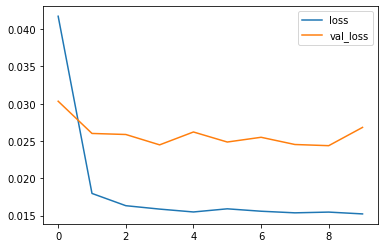

In [27]:
loss = pd.DataFrame(hit.history)
loss.plot()

In [28]:
y_pred = model.predict(X_test, verbose=1)

22/22 [==============================] - 1s 3ms/step


In [29]:
print(y_pred.shape, y_test.shape)

(700, 4, 1) (700, 4, 1)


In [30]:
def regression_error (y_test, y_pred):
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    
    print(f"MAE: {MAE}")
    print(f"MSE: {MSE}")
    print(f"RMSE: {RMSE}")
    print(f"r2: {r2}")

In [31]:
# flattern the batch time series data into a m by n matrix
# m = p.shape[1]: number of sensors, n=p.shape[0]*p.shape[2]: time steps
def flattern(p):
    pred_y_matrix = [[]for _ in range(len(p[0])) ]
    for pp in p:
        a = pp.tolist()
        for m in range(len(a)):
            pred_y_matrix[m] += a[m]
    return pred_y_matrix

# NOTE: Used after prediction

In [32]:
regression_error(flattern(y_test), flattern(y_pred))

MAE: 0.010254552213749005
MSE: 0.00031403641114493365
RMSE: 0.017721072516778822
r2: 0.9009667934900706


In [33]:
y_test_df = pd.DataFrame(flattern(y_test), 
                         index=['ADCP_Sensor_1', 'ADCP_Sensor_2', 'ADCP_Sensor_3', 'ADCP_Sensor_4']).transpose()
y_test_df.head()

,ADCP_Sensor_1,ADCP_Sensor_2,ADCP_Sensor_3,ADCP_Sensor_4
0,0.243907,0.063978,0.113063,0.170899
1,0.232462,0.090762,0.106816,0.165778
2,0.101073,0.078650,0.112007,0.323994
3,0.103836,0.077220,0.116434,0.588011
4,0.114530,0.075111,0.100898,0.566943


In [34]:
y_pred_df = pd.DataFrame(flattern(y_pred), 
                         index=['ADCP_Sensor_1', 'ADCP_Sensor_2', 'ADCP_Sensor_3', 'ADCP_Sensor_4']).transpose()
y_pred_df = y_pred_df.add_prefix('Bi-LSTM_')

In [35]:
res = pd.concat([y_test_df,y_pred_df],axis=1)
res.head()

,ADCP_Sensor_1,ADCP_Sensor_2,ADCP_Sensor_3,ADCP_Sensor_4,Bi-LSTM_ADCP_Sensor_1,Bi-LSTM_ADCP_Sensor_2,Bi-LSTM_ADCP_Sensor_3,Bi-LSTM_ADCP_Sensor_4
0,0.243907,0.063978,0.113063,0.170899,0.254610,0.056076,0.100663,0.161307
1,0.232462,0.090762,0.106816,0.165778,0.218244,0.081087,0.096479,0.158822
2,0.101073,0.078650,0.112007,0.323994,0.176673,0.082439,0.095852,0.154106
3,0.103836,0.077220,0.116434,0.588011,0.097975,0.079405,0.116313,0.537869
4,0.114530,0.075111,0.100898,0.566943,0.101371,0.067713,0.113126,0.547927


Text(0.5, 1.0, 'ADCP_Sensor_4')

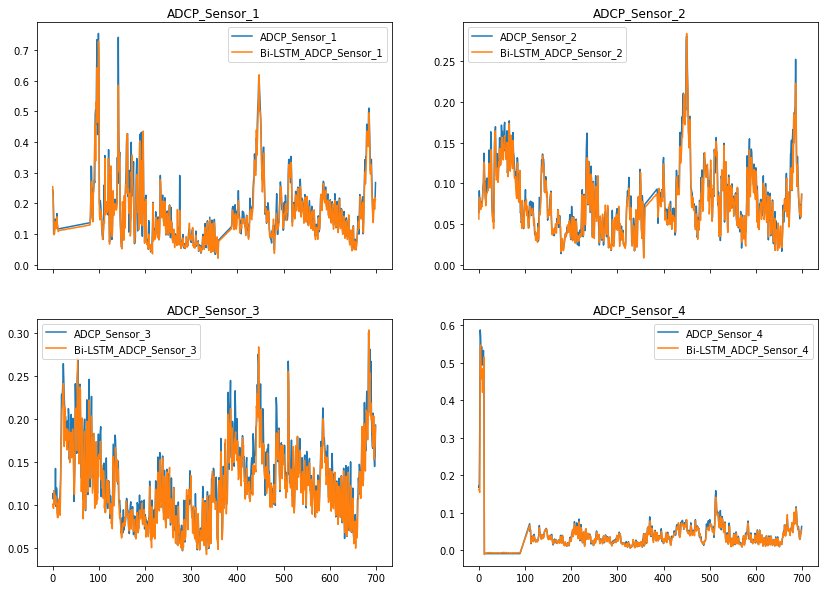

In [36]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(14,10))

res.filter(regex='_1',axis=1).plot(ax=axes[0,0])
axes[0,0].set_title('ADCP_Sensor_1')

res.filter(regex='_2',axis=1).plot(ax=axes[0,1])
axes[0,1].set_title('ADCP_Sensor_2')

res.filter(regex='_3',axis=1).plot(ax=axes[1,0])
axes[1,0].set_title('ADCP_Sensor_3')

res.filter(regex='_4',axis=1).plot(ax=axes[1,1])
axes[1,1].set_title('ADCP_Sensor_4')